In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
from utils import *

In [29]:
g = Log()
h = Sum()

# rank Shannon discrimination measure
f_r = Dsr()
rsdm = Gdm(h, g, f_r)

# conditional Shannon entropy
f = Ds()
sdm = Gdm(h, g, f)

In [131]:
dataset = LabeledSet(2)

for i in range(0, 20):
    dataset.addExample([random.uniform(0,4), random.uniform(10,14)],1)
# dataset.addExample([3, 4],1)

for i in range(0, 20):
    dataset.addExample([random.uniform(5,9), random.uniform(0,4)],2)
# dataset.addExample([8, 9],2)

for i in range(0, 20):
    dataset.addExample([random.uniform(10,14), random.uniform(5,9)],3)
# dataset.addExample([12, 0],3)

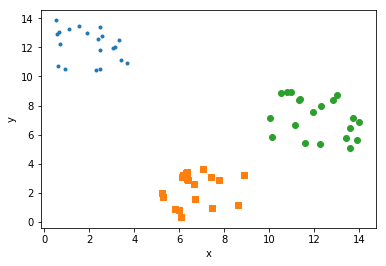

In [132]:
plot2DSet(dataset, "")

In [136]:
threshold_r, entropy_r = discretize(rsdm, dataset, 0)
print("entropy generated by rsdm on axis 0: ", entropy_r)

threshold_nr, entropy_nr = discretize(sdm, dataset, 0)
print("entropy generated by sdm on axis 0: ", entropy_nr)

entropy generated by rsdm on axis 0:  0.19498750024038541
entropy generated by sdm on axis 0:  0.6666666666666666


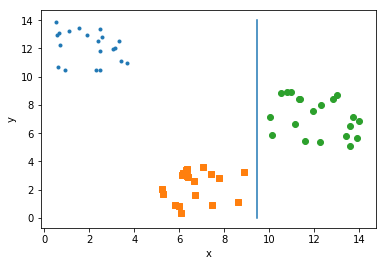

In [138]:
display_discretization(dataset, threshold_r, 0, "")

In [134]:
threshold_r, entropy_r = discretize(rsdm, dataset, 1)
print("entropy generated by rsdm on axis 1: ", entropy_r)

threshold_nr, entropy_nr = discretize(sdm, dataset, 1)
print("entropy generated by sdm on axis 1: ", entropy_nr)

entropy generated by rsdm on axis 1:  0.5283208335737188
entropy generated by sdm on axis 1:  0.6666666666666666


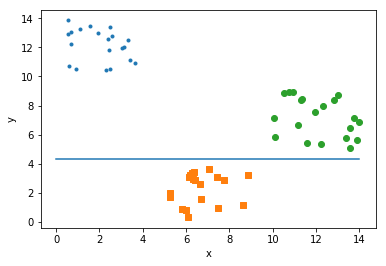

In [135]:
display_discretization(dataset, threshold_nr, 1, "")

In [142]:
train_set, test_set = split_dataset(dataset, 70)

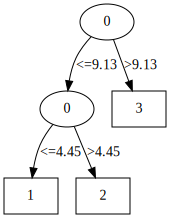

In [143]:
tree1 = RDMT(rsdm, "shannon", 0, 100, 0.05 * train_set.size(), [1, 2, 3])
tree1.train(train_set)
tree1.plot()

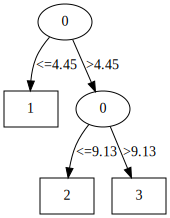

In [144]:
tree2 = RDMT(sdm, "shannon", 0, 100, 0.05 * train_set.size(), [1, 2, 3])
tree2.train(train_set)
tree2.plot()